# 가우시안 나이브로 문서의 종류 구분(classification)

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings(action='ignore') 

- 수치형데이터보다는 범주형데이터가 많다.
- 범주형데이터를 feature로 수치화하는 것이 중요하다.
- text를 vectorization 해서 특성변수로 적용한다.

## Categorical Features

주택가격이외 옆집 정보, 범주형 정보를 정보화하는 방법

In [12]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]
df = pd.DataFrame(data)
df

,price,rooms,neighborhood
0,850000,4,Queen Anne
1,700000,3,Fremont
2,650000,3,Wallingford
3,600000,2,Fremont


아래와 같이 코딩하는 것이 떠오른다

In [4]:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

- one-hot encoding(absence of a category with a value of 1 or 0)
- 데이터가 사전형 리스트일 경우 Scikit-Learn's ``DictVectorizer``을 사용

In [7]:
df.dtypes

price            int64
rooms            int64
neighborhood    object
dtype: object

In [19]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

- 'neighborhood' column은 원핫코딩
- 각 컬럼의 의미는(feature names)

In [14]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [16]:
pd.DataFrame(vec.fit_transform(data), columns= vec.get_feature_names())

,neighborhood=Fremont,neighborhood=Queen Anne,neighborhood=Wallingford,price,rooms
0,0,1,0,850000,4
1,1,0,0,700000,3
2,0,0,1,650000,3
3,1,0,0,600000,2


### 희소행렬(sparse matrix)
- 범주형의 종류가 많아지면 컬럼의 개수가 증가하게 되는 단점(차원의 저주)
- 원핫코드의 행렬은 대부분 '0'이 많기 때문에 희소행렬(sparse matrix)로 희소행렬 방식을 사용

In [20]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

In [21]:
vec.fit_transform(data).toarray()

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [34]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=6)
f = h.transform(data)
f.toarray()
pd.DataFrame(f.toarray())

array([[ 0.0e+00, -4.0e+00, -8.5e+05,  0.0e+00, -1.0e+00,  0.0e+00],
       [ 0.0e+00, -3.0e+00, -7.0e+05,  0.0e+00,  0.0e+00,  1.0e+00],
       [ 0.0e+00, -3.0e+00, -6.5e+05,  0.0e+00,  0.0e+00, -1.0e+00],
       [ 0.0e+00, -2.0e+00, -6.0e+05,  0.0e+00,  0.0e+00,  1.0e+00]])

,0,1,2,3,4,5
0,0.0,-4.0,-850000.0,0.0,-1.0,0.0
1,0.0,-3.0,-700000.0,0.0,0.0,1.0
2,0.0,-3.0,-650000.0,0.0,0.0,-1.0
3,0.0,-2.0,-600000.0,0.0,0.0,1.0


Many (though not yet all) of the Scikit-Learn estimators accept such sparse inputs when fitting and evaluating models. ``sklearn.preprocessing.OneHotEncoder`` and ``sklearn.feature_extraction.FeatureHasher`` are two additional tools that Scikit-Learn includes to support this type of encoding.

## Text Features

### 단어의 빈도를 수자로 표현(word counts)
- 총 3개의 문서가 리스트형식으로 있다고 가정

In [38]:
sample_kor = ['아버지가 가방에 들어가신다.', '어머니는 시장에 가신다', '붙여쓰면모르지']

In [40]:
pd.DataFrame(sample_kor)

,0
0,아버지가 가방에 들어가신다.
1,어머니는 시장에 가신다
2,붙여쓰면모르지


### 1. CountVectorizer : 각 문서에 나타난 단어의  출현 빈도

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample_kor)
X
X.toarray()

<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

array([[1, 0, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [42]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,가방에,가신다,들어가신다,붙여쓰면모르지,시장에,아버지가,어머니는
0,1,0,1,0,0,1,0
1,0,1,0,0,1,0,1
2,0,0,0,1,0,0,0


In [43]:
sample = ['problem of evil', 'evil queen', 'horizon problem']

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

The result is a sparse matrix recording the number of times each word appears; it is easier to inspect if we convert this to a ``DataFrame`` with labeled columns:

In [46]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


## 2. TF–IDF
- CountVectorizer 방식의 단점은 너무 자주 나오는 단어에 가중치가 높아져 sub-optimal in some classification algorithms.
- 이러한 점을 보완하기 위해 *term frequency-inverse document frequency* (*TF–IDF*) 

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


# Multinomial naive Bayes
- text classification에 종종 사용
- 단어의 출현빈도가 특성변수와 관련
- 20 Newsgroups corpus를 사용하여 3개의 그룹으로 분류하는 방법

In [92]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
type(data)

sklearn.utils.Bunch

In [49]:
df = pd.DataFrame(data['data'], columns= ['content'])
df['target'] = pd.Series(data.target)
df.head()

,content,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [53]:
'|||'.join(data.target_names)

'alt.atheism|||comp.graphics|||comp.os.ms-windows.misc|||comp.sys.ibm.pc.hardware|||comp.sys.mac.hardware|||comp.windows.x|||misc.forsale|||rec.autos|||rec.motorcycles|||rec.sport.baseball|||rec.sport.hockey|||sci.crypt|||sci.electronics|||sci.med|||sci.space|||soc.religion.christian|||talk.politics.guns|||talk.politics.mideast|||talk.politics.misc|||talk.religion.misc'

In [54]:
categories = ['talk.religion.misc', 'soc.religion.christian','sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [61]:
pd.DataFrame(train.data, columns=['contents'])

,contents
0,From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)\...
1,From: MANDTBACKA@finabo.abo.fi (Mats Andtbacka...
2,From: mccall@mksol.dseg.ti.com (fred j mccall ...
3,From: revdak@netcom.com (D. Andrew Kille)\nSub...
4,From: hl7204@eehp22 (H L)\nSubject: Re: Graphi...
...,...
2148,From: mcovingt@aisun3.ai.uga.edu (Michael Covi...
2149,From: alamut@netcom.com (Max Delysid (y!))\nSu...
2150,From: Christopher.S.Weinberger@williams.edu (G...
2151,From: ch981@cleveland.Freenet.Edu (Tony Alicea...


In [55]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



### TF-IDF vectorizer와 multinomial naive Bayes classifier를 를 pipeline으로 구성

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

파이프라인을 데이터에 적용하여 예측하면

In [63]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [64]:
labels

array([2, 0, 1, ..., 1, 2, 1], dtype=int64)

- test data의 레이블을 예측하고 실제 자료의 레이블과 confusion matrix를 확인하면

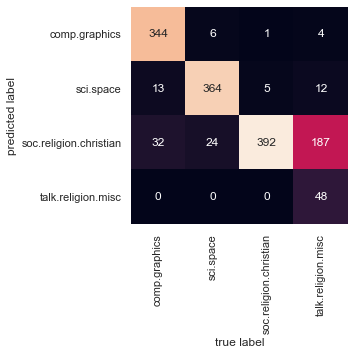

In [65]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label');

In [73]:
model

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

### 새로운 값(text)를 예측해보자

In [84]:
train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [82]:
model.predict(['I am a robot cop.'])
y_pred = model.predict(['I am a robot cop.'])

array([2], dtype=int64)

In [81]:
train.target_names

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

In [85]:
train.target_names[y_pred[0]]

'soc.religion.christian'

### 예측 반복작업을 함수로 만들어

In [87]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Let's try it out:

In [88]:
predict_category('sending a payload to the ISS')

'sci.space'

In [89]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [90]:
predict_category('determining the screen resolution')

'comp.graphics'

In [91]:
predict_category('scrip a code to run data')

'comp.graphics'

##  <font color='red'> 각 단어의 빈도로 예측이 거의 완벽
### 모든 naive algorithm은 대용량 high-dimensional text 자료에 잘 사용할 경우 언비리버블하게 잘 예측한다